In [1]:
print("Shivaya Namah")

Shivaya Namah


In [2]:
from langchain_core.prompts import PromptTemplate
from pydantic_settings import BaseSettings
from langchain_google_genai.chat_models import ChatGoogleGenerativeAI
from langchain_tavily import TavilySearch
from langchain import hub
from langchain_cohere.chat_models import ChatCohere
from langchain_ibm.chat_models import ChatWatsonx

class Settings(BaseSettings): 

    pinecone_api_key: str 
    watsonx_apikey: str  
    watsonx_url: str
    watsonx_project_id: str
    cohere_api_key: str 
    tavily_api_key: str
    google_api_key: str

    langsmith_api_key: str
    langsmith_endpoint: str
    langsmith_tracing: bool
    langsmith_project: str

    class Config:
        env_file = ".env"
        extra = "ignore"

settings = Settings()
print("API Keys loaded succesfully.")

API Keys loaded succesfully.


In [3]:
tavily_search = TavilySearch(
    tavily_api_key = settings.tavily_api_key,
    max_results = 2
)
tavily_search

TavilySearch(max_results=2, api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********'), api_base_url=None))

In [5]:
from datetime import datetime
from langchain_core.tools import tool 

@tool(
    name_or_callable = "date_time", 
    description = "Use when you need to get current date and time.",
    parse_docstring = True
)
def get_current_date():
    """Returns the current Date."""
    return datetime.now().strftime("%Y-%m-%d %I:%M:%S, %p")

@tool(
    name_or_callable = "addition",
    description = "Use when you need to perform addition operation.",
    # parse_docstring = True
)
def addition(num_1: int | float, num_2: int | float) -> float:
    """Returns the addition of two numbers."""
    return num_1 + num_2

In [6]:
get_current_date

StructuredTool(name='date_time', description='Use when you need to get current date and time.', args_schema=<class 'langchain_core.utils.pydantic.date_time'>, func=<function get_current_date at 0x000002555B7A51C0>)

In [7]:
addition

StructuredTool(name='addition', description='Use when you need to perform addition operation.', args_schema=<class 'langchain_core.utils.pydantic.addition'>, func=<function addition at 0x000002555B7A5760>)

In [8]:
addition.invoke(input = {"num_1": 5, "num_2": 5})

10

In [11]:
get_current_date.invoke("")

'2025-07-25 02:35:10, PM'

In [10]:
addition(tool_input = {"num_1": 5, "num_2": 5})

C:\Users\user\AppData\Local\Temp\ipykernel_2432\3314688781.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  addition(tool_input = {"num_1": 5, "num_2": 5})


10

In [12]:
get_current_date({})

'2025-07-25 02:35:25, PM'

In [13]:
react_prompt_template: PromptTemplate = hub.pull("hwchase17/react", api_key = settings.langsmith_api_key)
react_prompt_template

PromptTemplate(input_variables=['agent_scratchpad', 'input', 'tool_names', 'tools'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'hwchase17', 'lc_hub_repo': 'react', 'lc_hub_commit_hash': 'd15fe3c426f1c4b3f37c9198853e4a86e20c425ca7f4752ec0c9b0e97ca7ea4d'}, template='Answer the following questions as best you can. You have access to the following tools:\n\n{tools}\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [{tool_names}]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\nBegin!\n\nQuestion: {input}\nThought:{agent_scratchpad}')

In [14]:
print(react_prompt_template.template)

Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


In [15]:
react_prompt_template.input_variables

['agent_scratchpad', 'input', 'tool_names', 'tools']

In [18]:

cohere_llm = ChatCohere(
    cohere_api_key = settings.cohere_api_key,
    max_tokens = 3000,
    temperature = 0.9
)

google_llm = ChatGoogleGenerativeAI(
    google_api_key =  settings.google_api_key,
    model = "gemini-2.5-flash",
    max_tokens = 3000,
    temperature = 0.9
)

ibm_llm = ChatWatsonx(
    apikey = settings.watsonx_apikey,
    project_id = settings.watsonx_project_id,
    url = settings.watsonx_url,
    temperature = 0.9,
    max_tokens = 3000,
    model_id = "ibm/granite-3-2-8b-instruct"
)

llms: dict = {
    "ibm": ibm_llm,
    "cohere": cohere_llm,
    "google": google_llm
}

llms

{'ibm': ChatWatsonx(model_id='ibm/granite-3-2-8b-instruct', project_id='25fa768b-a90b-433c-b4a4-66bb407af16b', url=SecretStr('**********'), apikey=SecretStr('**********'), params={'max_tokens': 3000, 'temperature': 0.9}, max_tokens=3000, temperature=0.9, watsonx_model=<ibm_watsonx_ai.foundation_models.inference.model_inference.ModelInference object at 0x000002555D3CCF50>),
 'cohere': ChatCohere(client=<cohere.client.Client object at 0x000002555DE2A710>, async_client=<cohere.client.AsyncClient object at 0x000002555DE2B390>, model='command-a-03-2025', temperature=0.9, cohere_api_key=SecretStr('**********')),
 'google': ChatGoogleGenerativeAI(model='models/gemini-2.5-flash', google_api_key=SecretStr('**********'), temperature=0.9, max_output_tokens=3000, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000002555D76A8B0>, default_metadata=(), model_kwargs={})}

In [89]:
from langchain.agents import create_react_agent
from langchain.schema.runnable import Runnable
from typing import List
from langchain_core.tools import BaseTool


tools: List[BaseTool] = [get_current_date, addition, tavily_search]
agent: Runnable = create_react_agent(
    llm = llms["google"],
    prompt = react_prompt_template,
    tools = tools
)
agent

RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: format_log_to_str(x['intermediate_steps']))
})
| PromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={}, partial_variables={'tools': 'date_time() - Use when you need to get current date and time.\naddition(num_1: int | float, num_2: int | float) -> float - Use when you need to perform addition operation.\ntavily_search - A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'tool_names': 'date_time, addition, tavily_search'}, metadata={'lc_hub_owner': 'hwchase17', 'lc_hub_repo': 'react', 'lc_hub_commit_hash': 'd15fe3c426f1c4b3f37c9198853e4a86e20c425ca7f4752ec0c9b0e97ca7ea4d'}, t

In [125]:
from langchain_core.exceptions import OutputParserException
try:
    response = agent.invoke({"input": "how are you?", "intermediate_steps": [], "agent_outcome": None})
except OutputParserException as e:
    print(f"LLM Resut: {e.llm_output}")


LLM Resut: I am an AI assistant, a large language model, trained by Google. I do not have feelings or personal experiences, so I am just functioning as designed.


In [123]:
response

AgentFinish(return_values={'output': 'Hello! How can I help you today?'}, log='Final Answer: Hello! How can I help you today?')

In [121]:
response.return_values

{'output': 'Hello! How can I help you today?'}

In [93]:
print(response.log)

Final Answer: Hello! How can I help you today?


In [94]:
response = agent.invoke({"input": "what is capital of China?", "intermediate_steps": [], "agent_outcome": None})

In [95]:
response

AgentAction(tool='tavily_search', tool_input='capital of China', log='Action: tavily_search\nAction Input: capital of China')

In [96]:
print(response)

tool='tavily_search' tool_input='capital of China' log='Action: tavily_search\nAction Input: capital of China'


In [98]:
response.tool_input

'capital of China'

In [99]:
print(response.log)

Action: tavily_search
Action Input: capital of China


In [100]:
response = agent.invoke({"input": "sum of 8 and 17?", "intermediate_steps": [], "agent_outcome": None})

In [101]:
response

AgentAction(tool='addition', tool_input="{'num_1': 8, 'num_2': 17}", log="Action: addition\nAction Input: {'num_1': 8, 'num_2': 17}")

In [102]:
print(response.tool)
print(response.tool_input) 
print(response.log)

addition
{'num_1': 8, 'num_2': 17}
Action: addition
Action Input: {'num_1': 8, 'num_2': 17}


In [103]:
type(response.tool_input)

str

### In LangChain We use Something called AgentExecutor to execute the agent, that handle the answering question.

In [104]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(
    agent = agent,
    tools = tools,
    handle_parsing_errors = True,
    verbose = True   
)
agent_executor

AgentExecutor(verbose=True, agent=RunnableAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: format_log_to_str(x['intermediate_steps']))
})
| PromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={}, partial_variables={'tools': 'date_time() - Use when you need to get current date and time.\naddition(num_1: int | float, num_2: int | float) -> float - Use when you need to perform addition operation.\ntavily_search - A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'tool_names': 'date_time, addition, tavily_search'}, metadata={'lc_hub_owner': 'hwchase17', 'lc_hub_repo': 'react', 'lc_hub_commit_hash': 'd15fe3c426f1

In [105]:
result = agent_executor.invoke(
    {
        "input": "what is the date today?"
    }
)
result



> Entering new AgentExecutor chain...
Action: date_time
Action Input: 2025-07-25 02:59:01, PMI now know the final answer
Final Answer: Today's date is 2025-07-25.

> Finished chain.


{'input': 'what is the date today?', 'output': "Today's date is 2025-07-25."}

In [77]:
response = agent_executor.invoke(
    {
        "input": "When Coolie movie release and who is the main actor."
    }
)
response



> Entering new AgentExecutor chain...
Thought: To answer this question, I need to find out the release date of the movie "Coolie" and the name of the main actor. I will perform a search to get this information.

Action: tavily_search
Action Input: "Coolie movie release date and main actor"O{'query': 'Coolie movie release date and main actor"O', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://www.imdb.com/title/tt27441481/', 'title': 'Coolie (2025) - IMDb', 'content': 'Coolie: Directed by Lokesh Kanagaraj. With Aamir Khan, Rajinikanth, Pooja ... Release date · August 14, 2025 (India). Country of origin. India. Official', 'score': 0.82186085, 'raw_content': None}, {'url': 'https://timesofindia.indiatimes.com/entertainment/hindi/bollywood/news/lokesh-kanagaraj-confirms-coolie-trailer-to-release-on-august-2-release-teases-aamir-khans-film-as-biggest-action-movie-yet/articleshow/122480674.cms', 'title': "Lokesh Kanagaraj confirms 'Coolie' trailer to

{'input': 'When Coolie movie release and who is the main actor.',
 'output': 'There are two movies titled "Coolie." The first one, released on December 2, 1983, stars Amitabh Bachchan as the main actor. The second "Coolie" movie is set to release on August 14, 2025, and features Aamir Khan and Rajinikanth in prominent roles.'}

In [78]:
response = agent_executor.invoke({
    "input": "What is the capital of India and my current time."
})



> Entering new AgentExecutor chain...
To answer this question, I need to find the capital of India and also determine the current time. I can use the tavily_search tool to find the capital of India and the date_time tool to get the current time.

Action: tavily_search
Action Input: What is the capital of India?O{'query': 'What is the capital of India?O', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://www.quora.com/What-is-the-capital-of-India-328', 'title': 'What is the capital of India? - Quora', 'content': 'New Delhi is the capital of India, but it was not always NEW DELHI, during Britishers untill 1911, CALCUTTA was the capital of India.', 'score': 0.86080295, 'raw_content': None}, {'url': 'https://en.wikipedia.org/wiki/New_Delhi', 'title': 'New Delhi - Wikipedia', 'content': 'New Delhi is the capital of India and a part of the National Capital Territory of Delhi (NCT). New Delhi is the seat of all three branches of the Government', 'score'

In [79]:
response

{'input': 'What is the capital of India and my current time.',
 'output': 'The capital of India is New Delhi, and the current time is 2025-07-25 02:54:21 PM.'}

## Now we are going to build this Agent using LangGraph

In [106]:
import operator
from typing import List, TypedDict, Annotated, Tuple
from langchain_core.agents import AgentAction, AgentFinish
from langchain_core.tools import StructuredTool
from dotenv import load_dotenv
load_dotenv()

tools: List[StructuredTool | TavilySearch] = [get_current_date, tavily_search, addition]

class AgentState(TypedDict):
    input: str
    agent_outcome: AgentAction | AgentFinish | None 
    intermediate_steps: Annotated[List[Tuple[AgentAction, str]], operator.concat]

agent: Runnable = create_react_agent(
    llm = llms["google"],
    prompt = react_prompt_template,
    tools = tools
)
agent

RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: format_log_to_str(x['intermediate_steps']))
})
| PromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={}, partial_variables={'tools': 'date_time() - Use when you need to get current date and time.\ntavily_search - A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.\naddition(num_1: int | float, num_2: int | float) -> float - Use when you need to perform addition operation.', 'tool_names': 'date_time, tavily_search, addition'}, metadata={'lc_hub_owner': 'hwchase17', 'lc_hub_repo': 'react', 'lc_hub_commit_hash': 'd15fe3c426f1c4b3f37c9198853e4a86e20c425ca7f4752ec0c9b0e97ca7ea4d'}, t

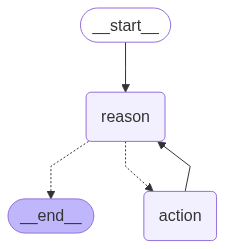

In [107]:
from langgraph.graph import StateGraph, END
from dotenv import load_dotenv
import json

load_dotenv(".env")

REASON = "reason"
ACTION = "action"

def reason_node(state: AgentState) -> AgentState:
    agent_outcome: AgentAction | AgentFinish = agent.invoke(state)
    print(f"Current agent outcome {agent_outcome}", end = "\n")
    return {
        "agent_outcome": agent_outcome
    }    

def action_node(state: AgentState) -> AgentState:


    agent_action: AgentAction = state["agent_outcome"]
    print(f"Current agent_action: {agent_action}", end = "\n")

    # Extract tool name and tool input from AgentAction
    tool_name = agent_action.tool
    tool_input = agent_action.tool_input

    # Find the matching tool function.
    tool_function: BaseTool | None = None
    for tool in tools:
        if tool.name == tool_name:
            tool_function = tool
            break

    # Try to load the tool input, if it is like a JSON.
    parsed_input = tool_input
    if isinstance(parsed_input, str):
        try:
            parsed_input = json.loads(tool_input)
            print(f"The parsed input is {parsed_input}")
        except json.JSONDecodeError:
            pass # Leave it as string if not a valid JSON

    
    # Execute the tool function with parsed_input. 
    if tool_function:
        try:
            if isinstance(tool_function, StructuredTool):
                output = tool_function.invoke(input = parsed_input)
            else:
                output = tool_function.invoke(parsed_input)

        except Exception as e:
            print(f"Unexpected Error occurs {str(e)}")
    else:
        output = f"Tool {tool_name} not found."
    
    return {
        "intermediate_steps": [(agent_action, output)]
    }

def should_continue(state: AgentState) -> AgentState:
    print(f"Current agent outcome in should_continue: {state["agent_outcome"]}")
    if isinstance(state["agent_outcome"], AgentFinish):
        return END 
    return ACTION


graph_builder = StateGraph(AgentState)
graph_builder.add_node(REASON, reason_node)
graph_builder.add_node(ACTION, action_node)

graph_builder.set_entry_point(REASON)
graph_builder.add_edge(ACTION, REASON)
graph_builder.add_conditional_edges(
    REASON,
    should_continue,
    path_map = {
        ACTION: ACTION,
        END: END
    }
)
graph = graph_builder.compile()
graph


In [108]:
response: AgentState = graph.invoke(
    AgentState(
        # input = "when the coolie movie release and the current date, also the capital city of India",
        input = "what is the current time?",
        agent_outcome = None,
        intermediate_steps = []
    )
)

Current agent outcome tool='date_time' tool_input='' log='Action: date_time\nAction Input: '
Current agent outcome in should_continue: tool='date_time' tool_input='' log='Action: date_time\nAction Input: '
Current agent_action: tool='date_time' tool_input='' log='Action: date_time\nAction Input: '
Current agent outcome return_values={'output': '02:59:31 PM on 2025-07-25'} log='I now know the final answer\nFinal Answer: 02:59:31 PM on 2025-07-25'
Current agent outcome in should_continue: return_values={'output': '02:59:31 PM on 2025-07-25'} log='I now know the final answer\nFinal Answer: 02:59:31 PM on 2025-07-25'


In [109]:
response

{'input': 'what is the current time?',
 'agent_outcome': AgentFinish(return_values={'output': '02:59:31 PM on 2025-07-25'}, log='I now know the final answer\nFinal Answer: 02:59:31 PM on 2025-07-25'),
 'intermediate_steps': [(AgentAction(tool='date_time', tool_input='', log='Action: date_time\nAction Input: '),
   '2025-07-25 02:59:31, PM')]}

In [110]:
response: AgentState = graph.invoke(
    AgentState(
        input = "The capital city of China.",
        # input = "what is the current time?",
        agent_outcome = None,
        intermediate_steps = []
    )
)

Current agent outcome tool='tavily_search' tool_input='capital city of China' log='Action: tavily_search\nAction Input: capital city of China'
Current agent outcome in should_continue: tool='tavily_search' tool_input='capital city of China' log='Action: tavily_search\nAction Input: capital city of China'
Current agent_action: tool='tavily_search' tool_input='capital city of China' log='Action: tavily_search\nAction Input: capital city of China'
Current agent outcome return_values={'output': 'Beijing'} log='I now know the final answer\nFinal Answer: Beijing'
Current agent outcome in should_continue: return_values={'output': 'Beijing'} log='I now know the final answer\nFinal Answer: Beijing'


In [111]:
response

{'input': 'The capital city of China.',
 'agent_outcome': AgentFinish(return_values={'output': 'Beijing'}, log='I now know the final answer\nFinal Answer: Beijing'),
 'intermediate_steps': [(AgentAction(tool='tavily_search', tool_input='capital city of China', log='Action: tavily_search\nAction Input: capital city of China'),
   {'query': 'capital city of China',
    'follow_up_questions': None,
    'answer': None,
    'images': [],
    'results': [{'url': 'https://clintonwhitehouse3.archives.gov/WH/New/China/beijing.html',
      'title': 'Beijing - The White House',
      'content': 'The modern day capital of China is Beijing (literally "Northern Capital"), which first served as China\'s capital city in 1261, when the Mongol ruler Kublai',
      'score': 0.8877607,
      'raw_content': None},
     {'url': 'https://www.britannica.com/place/Beijing',
      'title': 'Beijing | Province, City, History, Map, & Facts | Britannica',
      'content': 'The Forbidden City is an imperial palace 

In [113]:
response["agent_outcome"].return_values

{'output': 'Beijing'}

In [114]:
response: AgentState = graph.invoke(
    AgentState(
        input = "Get today's date and month and sum it.",
        # input = "what is the current time?",
        agent_outcome = None,
        intermediate_steps = []
    )
)

Current agent outcome tool='date_time' tool_input='' log='Action: date_time\nAction Input: '
Current agent outcome in should_continue: tool='date_time' tool_input='' log='Action: date_time\nAction Input: '
Current agent_action: tool='date_time' tool_input='' log='Action: date_time\nAction Input: '
Current agent outcome tool='addition' tool_input='{"num_1": 25, "num_2": 7}' log='I have today\'s date and time: 2025-07-25 03:00:30, PM.\nFrom this, the day is 25 and the month is 7.\nI need to sum these two numbers.\nAction: addition\nAction Input: {"num_1": 25, "num_2": 7}'
Current agent outcome in should_continue: tool='addition' tool_input='{"num_1": 25, "num_2": 7}' log='I have today\'s date and time: 2025-07-25 03:00:30, PM.\nFrom this, the day is 25 and the month is 7.\nI need to sum these two numbers.\nAction: addition\nAction Input: {"num_1": 25, "num_2": 7}'
Current agent_action: tool='addition' tool_input='{"num_1": 25, "num_2": 7}' log='I have today\'s date and time: 2025-07-25 0

In [115]:
response["agent_outcome"].return_values

{'output': '32'}

In [116]:
response["intermediate_steps"]

[(AgentAction(tool='date_time', tool_input='', log='Action: date_time\nAction Input: '),
  '2025-07-25 03:00:30, PM'),
 (AgentAction(tool='addition', tool_input='{"num_1": 25, "num_2": 7}', log='I have today\'s date and time: 2025-07-25 03:00:30, PM.\nFrom this, the day is 25 and the month is 7.\nI need to sum these two numbers.\nAction: addition\nAction Input: {"num_1": 25, "num_2": 7}'),
  32)]